## Classification on Iris dataset - Voulgari Eleni

### Step 1: Prepare Project

   1. Load libraries
   2. Load dataset

In [1]:
import matplotlib.pyplot as plt
import itertools
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
iris_data = datasets.load_iris()  # Load the dataset and check the type to be able to procceed
type(iris_data)

sklearn.datasets.base.Bunch

### Step 2: Define Problem

##### What is your task? What are your goals? What do you want to achieve?

The task is to understand the nature of the dataset and the features it contains and then apply a set of machine learning algorithms to perform classification on it. The goal is to find the best classification algorithm and the best model for this specific dataset by evaluating each one of them.

### Step 3: Exploratory Analysis

##### Understand your data: Take a “peek” of your data, answer basic questions about the dataset. Summarise your data. Explore descriptive statistics and visualisations.

In [3]:
iris_data.keys()  # The Iris dataset is loaded as a Bunch, which is a subclass of dict,
                  # thus it supports all the methods a dict does

['target_names', 'data', 'target', 'DESCR', 'feature_names']

Let's explore the content of each one  of the keys:

In [4]:
class_names = iris_data.target_names
iris_data['target_names']  # The names of the targets are shown below:

array(['setosa', 'versicolor', 'virginica'],
      dtype='|S10')

In [5]:
iris_data['DESCR']

'Iris Plants Database\n====================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)\n    ============== ==== ==== ======= ===== ============

In [6]:
print iris_data['data']        # We observe that there are 4 columns, so there are 4 features for this dataset
print iris_data['data'].shape  # the number of the rows is the number of the samples (150, shape: (150,4)) 
                               # The type of every attribute seem to be numeric.

[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]
 [ 5.4  3.9  1.7  0.4]
 [ 4.6  3.4  1.4  0.3]
 [ 5.   3.4  1.5  0.2]
 [ 4.4  2.9  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.4  3.7  1.5  0.2]
 [ 4.8  3.4  1.6  0.2]
 [ 4.8  3.   1.4  0.1]
 [ 4.3  3.   1.1  0.1]
 [ 5.8  4.   1.2  0.2]
 [ 5.7  4.4  1.5  0.4]
 [ 5.4  3.9  1.3  0.4]
 [ 5.1  3.5  1.4  0.3]
 [ 5.7  3.8  1.7  0.3]
 [ 5.1  3.8  1.5  0.3]
 [ 5.4  3.4  1.7  0.2]
 [ 5.1  3.7  1.5  0.4]
 [ 4.6  3.6  1.   0.2]
 [ 5.1  3.3  1.7  0.5]
 [ 4.8  3.4  1.9  0.2]
 [ 5.   3.   1.6  0.2]
 [ 5.   3.4  1.6  0.4]
 [ 5.2  3.5  1.5  0.2]
 [ 5.2  3.4  1.4  0.2]
 [ 4.7  3.2  1.6  0.2]
 [ 4.8  3.1  1.6  0.2]
 [ 5.4  3.4  1.5  0.4]
 [ 5.2  4.1  1.5  0.1]
 [ 5.5  4.2  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.   3.2  1.2  0.2]
 [ 5.5  3.5  1.3  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 4.4  3.   1.3  0.2]
 [ 5.1  3.4  1.5  0.2]
 [ 5.   3.5  1.3  0.3]
 [ 4.5  2.3  1.3  0.3]
 [ 4.4  3.2  1.3  0.2]
 [ 5.   3.5

In [7]:
print iris_data['target']  # The values of this array are the target values and each digit (0,1,2) represent 
iris_data['target'].shape  # each one of the following classes ('setosa', 'versicolor', 'virginica')

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


(150,)

In [8]:
iris_data['feature_names']  # Contains the names and the order of the features

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [9]:
# We convert the iris_data into a dataframe which is easier to work with

iris = pd.DataFrame(data = np.c_[iris_data['data'], iris_data['target']], 
                    columns = iris_data['feature_names'] + ['target'])
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
5,5.4,3.9,1.7,0.4,0.0
6,4.6,3.4,1.4,0.3,0.0
7,5.0,3.4,1.5,0.2,0.0
8,4.4,2.9,1.4,0.2,0.0
9,4.9,3.1,1.5,0.1,0.0


In [10]:
pd.isnull(iris).any()

sepal length (cm)    False
sepal width (cm)     False
petal length (cm)    False
petal width (cm)     False
target               False
dtype: bool

As we can see from the peek we did at the data, the columns and the values make sense, with the values also being on the right scale. Additionally, there are no missing values. From the shape of the data (150, 5) we can understand that the number of the features is small and the data has too few observations. The fifth column contains the target values. At this point we would have to gather more instances of the data but this is beyond the scope of this assignment. 

Our next step is to apply some descriptive statistics that can give us great insight into the shape of each attribute. 
So we want to know how many flowers belong to each target value, thus to each class. The goal is to know if there is a class that has more flowers than the others. If this is true, it will probably create problems in the application of some machine learning algorithms.

In [11]:
iris.groupby('target').size() # We can see that the instances are evenly distributed between the classes

target
0.0    50
1.0    50
2.0    50
dtype: int64

In [12]:
iris.describe()  # We use describe(), which returns 8 statistical properties for each attribute, 
                 # to check the variance and other properties

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


The graphs below show the relationship between the different features. As we can observe, the petal features are divided better in clusters compared to the sepal features. This means that the petal features can result in more accurate predictions than the sepal features. This is also true if we choose one sepal feature and one petal feature. We will check this when applying the algorithms.

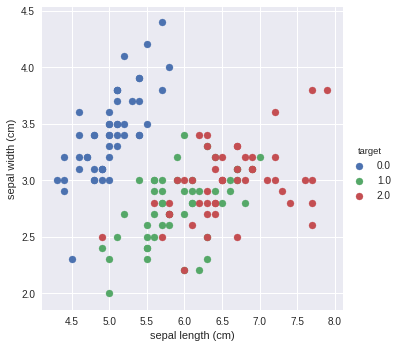

In [13]:
sns.FacetGrid(iris, hue="target", size=5).map(plt.scatter, "sepal length (cm)", "sepal width (cm)").add_legend()
plt.show()

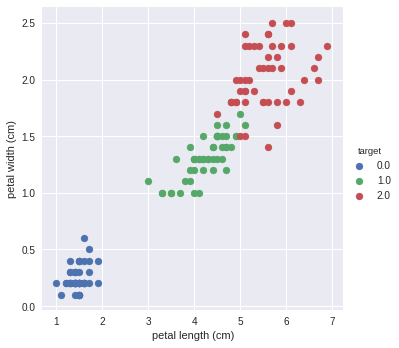

In [14]:
sns.FacetGrid(iris, hue="target", size=5).map(plt.scatter, "petal length (cm)", "petal width (cm)").add_legend()
plt.show()

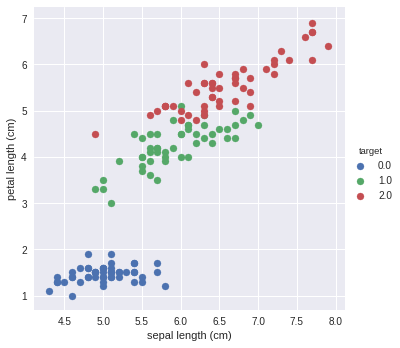

In [15]:
sns.FacetGrid(iris, hue="target", size=5).map(plt.scatter, "sepal length (cm)", "petal length (cm)").add_legend()
plt.show()

The correlation between the different features is very important, because there are algorithms that have the independence of the different variables as a bias. In the case that many of the features are highly correlated, if we train the algorithm with all the features as they, we will not produce a very good model. We display a matrix / heatmap  that shows if there is such correlation. The closer the value to 1, the higher the correlation.

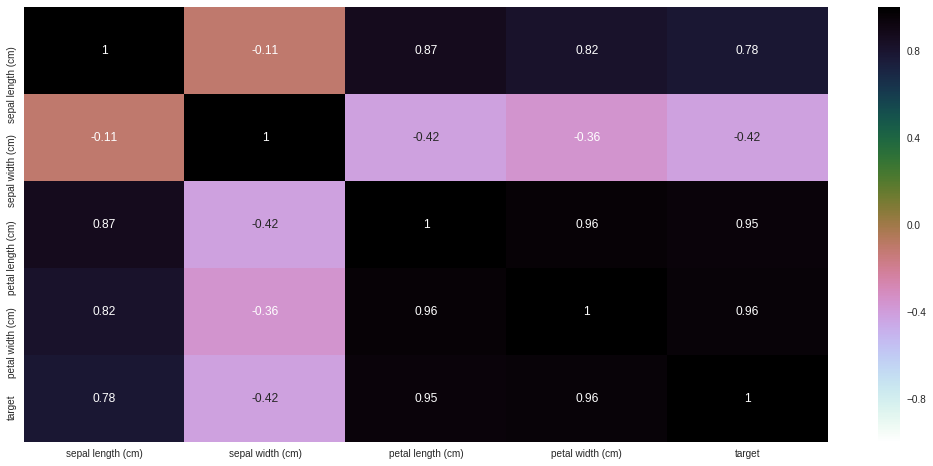

In [16]:
correlations = iris.corr()
plt.figure(figsize=(18,8)) 
sns.heatmap(correlations,annot=True,cmap='cubehelix_r')
plt.show()

We can observe that the features 'Sepal Width' and 'Sepal Length' are not correlated, but the features 'Petal Width' and 'Petal Length' are highly correlated.First, we will train the algorithms with all the features and measure the accuracy. Then we will use 'Sepal Length' and 'Petal Length' that are not correlated and again measure the accuracy of the algorithm. The second model may achieve better accuracy. We will check this later.

The next step is to identify if there are any outliers in the values of the features, something that could cause the algorithms to not behave as intended. If there are outliers, we have to consider removing them, BUT we have to be very careful and try to understand if the provided outlier is a value that is wrong or just a value that is possible to appear in real life but is rather rare. Here, none of the features seem to contain outliers.

In [17]:
iris.skew()

sepal length (cm)    0.314911
sepal width (cm)     0.334053
petal length (cm)   -0.274464
petal width (cm)    -0.104997
target               0.000000
dtype: float64

The next graphs are histograms that give us an insight of the distribution each attribute follows. A histogram represents the distribution of data by forming bins along the range of the data and then drawing bars to show the number of observations that fall in each bin. Here, there are clearly different distributions for each feature.

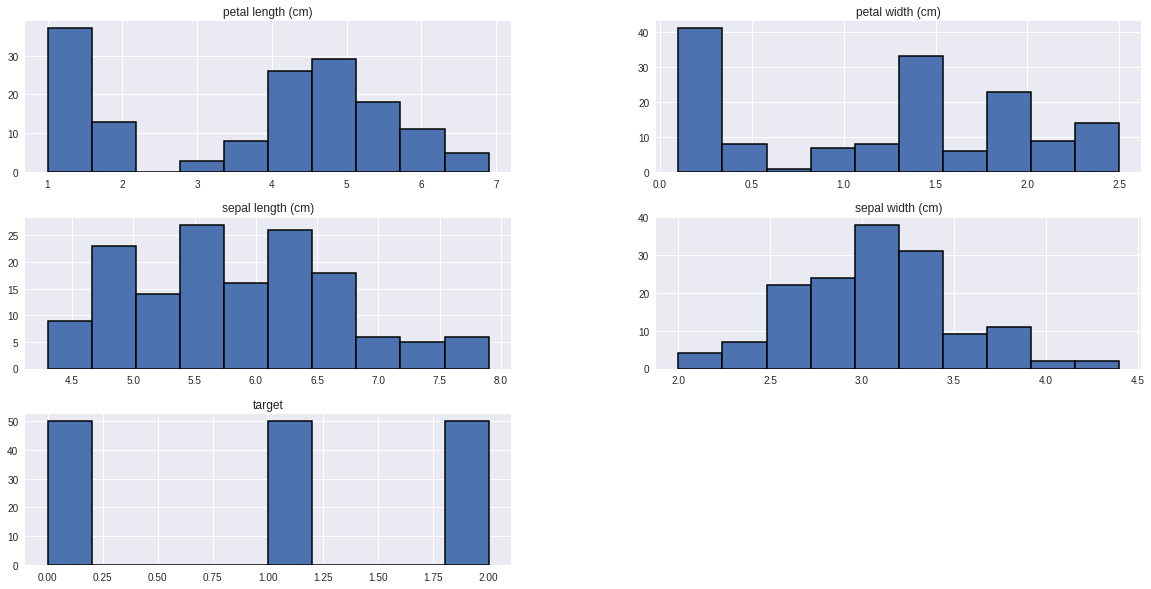

In [18]:
iris.hist(edgecolor='black', linewidth=1.5)
fig = plt.gcf()
fig.set_size_inches(20,10)
plt.show()

Next step is to create a boxplot. A box plot shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers”. We are also adding a layer of individual points on top of it through Seaborn's striplot. We'll use jitter=True so that all the points don't fall in single vertical lines above the classes. 

We can observe that the data is evenly distributed in the classes and there are no significant ouliers.

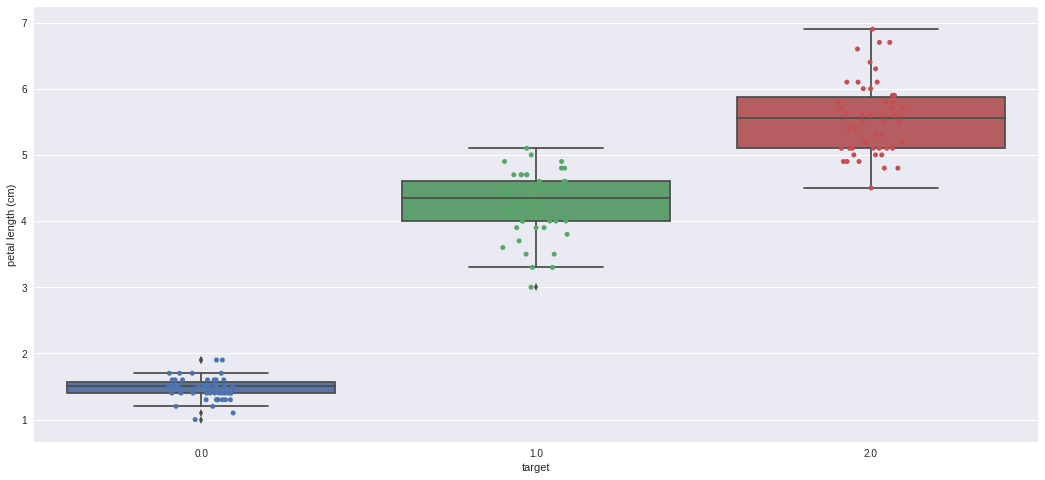

In [19]:
plt.figure(figsize=(18,8))
ax = sns.boxplot(x="target", y="petal length (cm)", data=iris)
ax = sns.stripplot(x="target", y="petal length (cm)", data=iris, jitter=True, edgecolor="gray")
plt.show()

### Step 4: Prepare Data

##### Data Cleaning/Data Wrangling/Collect more data (if necessary).


The next step is to prepare our data for the application of the algorithms. This step contains cleaning, wrangling and collecting more of tha data, things that are not really necessary for this dataset, as it is already in the right form to use. 

### Step 5: Feature Engineering

##### Feature selection/feture engineering (as in new features)/data transformations.

Our next step is Feature Engineering, in which a selection or a transformation of the features is being done. In our case, firstly we will not be making selection of the features, but as we mentioned above, because of the high correlation between the features 'Petal Width' and 'Petal Length', we will perform the same experiment with a selection of one of the sepal and one of the petal features, to access the accuracy. 

So we will create a sub-dataset that will contain one of the sepal features and one of the petal features.

In [20]:
Y = iris['target']
iris = iris.drop(['target'], axis = 1)
X_feat2 = iris.drop(['sepal width (cm)'], axis = 1)
X_feat2 = X_feat2.drop(['petal width (cm)'], axis = 1)
X_feat2

,sepal length (cm),petal length (cm)
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4
5,5.4,1.7
6,4.6,1.4
7,5.0,1.5
8,4.4,1.4
9,4.9,1.5


### Step 6: Algorithm Selection

##### Select a set of algorithms to apply, select evaluation metrics, and evaluate/compare algorithms.

Our next step is to apply a set of algorithms and select the best model. As we have already observed, this is a classification problem, because the objective for the model is to be able to predict the class ('setosa', 'versicolor', 'virginica') of a flower by the measurement of its sepals and petals. 

- We are going to compare a set of algorithms, regarding their accuracy:
1. Logistic Regression
2. Linear Discriminant Analysis
3. k-Nearest Neighbors
4. Decision Trees
5. Naive Bayes
6. Support Vector Machines

In [21]:
models = []
models.append(('LR',  LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('kNN', KNeighborsClassifier()))
models.append(('DT',  DecisionTreeClassifier()))
models.append(('NB',  GaussianNB()))
models.append(('SVM', SVC()))

scoring = 'accuracy'

We are going to perform the experiment with the whole dataset, thus all four features.

In [31]:
results = []
names   = []
kfold = KFold(n_splits=10, random_state=7)
for name, model in models:
    cv_results = cross_val_score(model, iris, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print("%03s: %f (+/- %f)" % (name, cv_results.mean(), cv_results.std()))

 LR: 0.880000 (+/- 0.148474)
LDA: 0.966667 (+/- 0.061464)
kNN: 0.933333 (+/- 0.084327)
 DT: 0.946667 (+/- 0.071802)
 NB: 0.946667 (+/- 0.058119)
SVM: 0.953333 (+/- 0.052068)


<IPython.core.display.Javascript object>


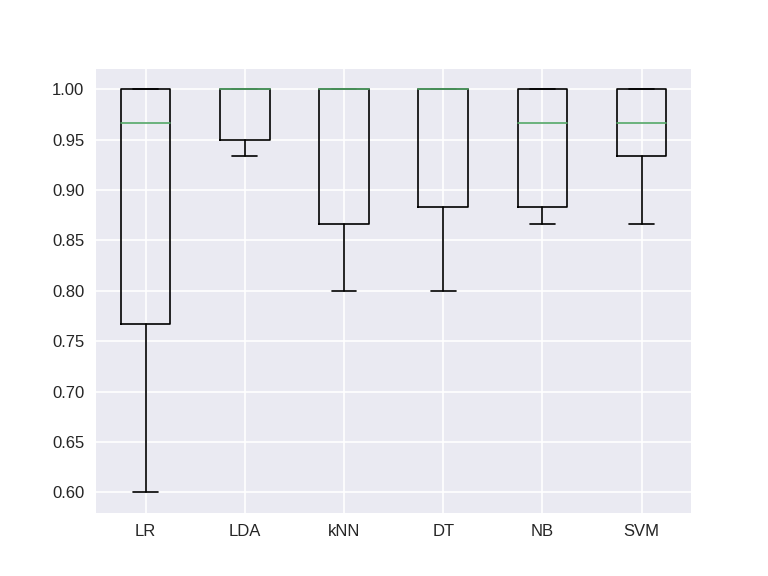

In [32]:
%matplotlib notebook

plt.boxplot(results)
plt.xticks(list(range(1,len(names)+1)), names)
plt.show()

Then, we are going to apply the algorithms to the dataset with the two features.

In [24]:
results = []
names   = []
kfold = KFold(n_splits=10, random_state=7)
for name, model in models:
    cv_results = cross_val_score(model, X_feat2, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print("%03s: %f (+/- %f)" % (name, cv_results.mean(), cv_results.std()))

 LR: 0.820000 (+/- 0.176509)
LDA: 0.953333 (+/- 0.060000)
kNN: 0.920000 (+/- 0.093333)
 DT: 0.913333 (+/- 0.089691)
 NB: 0.873333 (+/- 0.120922)
SVM: 0.933333 (+/- 0.059628)


<IPython.core.display.Javascript object>


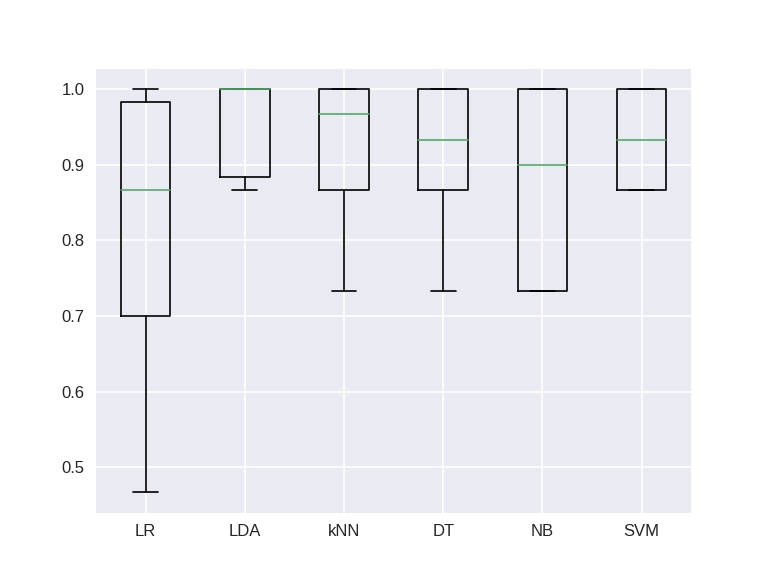

In [25]:
%matplotlib notebook

plt.boxplot(results)
plt.xticks(list(range(1,len(names)+1)), names)
plt.show()

From the results we can conclude that the best algorithm for our dataset is LDA with the original dataset (all four features).

### Step 7: Model Training

##### Apply ensembles and improve performance by hyperparameter optimisation.

Now that we have chosen the algorithm with the best accuracy, we are going to test it, by splitting the data into a train set and a test set, training the model with the train set and test it with the other to measure the accuracy.

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(iris, Y, test_size=0.2, random_state=8)

In [27]:
LDA = LinearDiscriminantAnalysis()  # We create the model by fitting the train set
model = LDA.fit(X_train, Y_train)

In [28]:
predictions = model.predict(X_test)  # We predict the Ys of the test set the model we have created 
print "Accuracy for test data is", accuracy_score(Y_test, predictions)

Accuracy for test data is 0.966666666667


As we can see the accuracy is the same that the k-fold produced for this algorithm.

Lastly, we are going to plot a confusion matrix for the test dataset to see how many labels where correctly predicted and how many were not. As we can observe the model has made one mistake and this is why the accuracy is not 1.

In [29]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

<IPython.core.display.Javascript object>


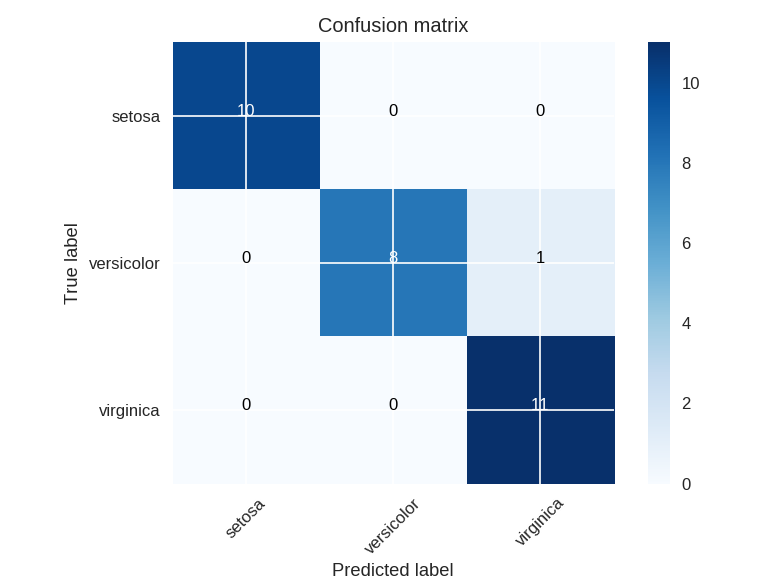

Confusion matrix
[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]


In [30]:
cf_m = confusion_matrix(Y_test, predictions) # By definition, entry i, j in a confusion matrix is the number of observations actually in group i, but predicted to be in group j
plt.figure()
plot_confusion_matrix(cf_m, classes=class_names, title='Confusion matrix')
plt.show()